# Weekly SNS monitoring
---
1. Open data
    * Youtube - subscription_data.csv,  gender_age_data.csv, video_data.csv
    * facebook - contents, fb_results, fb_targets
    * article - article title

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

In [136]:
font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


sns.set(font_scale=1.2)
# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [137]:
df_yt_subscription = pd.read_csv("../sns_data/2021-10-13/youtube/subscription_data.csv")
df_yt_gender_age = pd.read_csv("../sns_data/2021-10-13/youtube/gender_age_data.csv")
df_yt_video_data = pd.read_csv("../sns_data/2021-10-13/youtube/video_data.csv")

df_fb_contents = pd.read_csv("../sns_data/2021-10-13/facebook/contents.csv")
df_fb_results = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_results.csv")
df_fb_targets = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_targets.csv")

df_article = pd.read_csv("../sns_data/2021-10-13/article/article_title.csv")

In [140]:
df_yt_video_data.head()

,Date,Video,Video title,Video publish time,Views
0,2021-10-05,CE_DGHcW5YU,김동연이 여・야당의 러브콜을 모두 마다한 이유,"Oct 6, 2021",0
1,2021-10-06,CE_DGHcW5YU,김동연이 여・야당의 러브콜을 모두 마다한 이유,"Oct 6, 2021",373
2,2021-10-07,CE_DGHcW5YU,김동연이 여・야당의 러브콜을 모두 마다한 이유,"Oct 6, 2021",182
3,2021-10-08,CE_DGHcW5YU,김동연이 여・야당의 러브콜을 모두 마다한 이유,"Oct 6, 2021",567
4,2021-10-09,CE_DGHcW5YU,김동연이 여・야당의 러브콜을 모두 마다한 이유,"Oct 6, 2021",41


# Youtube

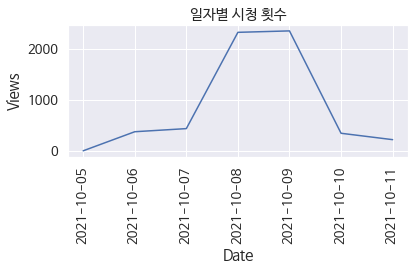

In [141]:
## View time series graph
gr = df_yt_video_data.groupby("Date")
groups = list(gr.groups.keys())
df_plot = gr.sum()
df_plot['Date'] = df_plot.index

ax = sns.lineplot(x="Date", y="Views", data=df_plot)
plt.xticks(rotation=90)
plt.title("일자별 시청 횟수")
plt.tight_layout()
plt.savefig("../weekly_plots/yt_views.png")

In [142]:
## Subscription
df_yt_subscription.head()

,Date,Subscription status,Views
0,2021-10-05,Subscribed,437
1,2021-10-06,Subscribed,1233
2,2021-10-07,Subscribed,908
3,2021-10-08,Subscribed,1241
4,2021-10-09,Subscribed,789


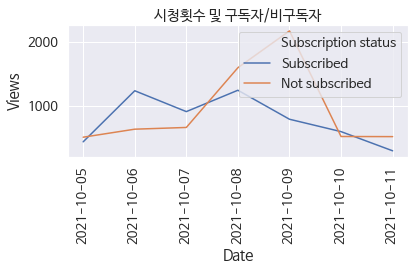

In [143]:
## Subscription Graph


df_plot = df_yt_subscription

ax = sns.lineplot(x="Date", y="Views", hue="Subscription status", data=df_plot)
plt.xticks(rotation=90)
plt.title("시청횟수 및 구독자/비구독자")
plt.tight_layout()

plt.savefig("../weekly_plots/yt_subscription.png")

In [144]:
## Gender age plot
df_yt_gender_age.head()

,Viewer age,Viewer gender,Views (%),Watch time (hours) (%)
0,13–17 years,Male,0.37,0.75
1,18–24 years,Female,0.33,0.08
2,18–24 years,Male,10.49,8.45
3,25–34 years,Female,0.97,0.69
4,25–34 years,Male,14.87,15.97


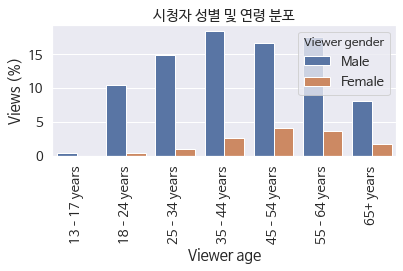

In [145]:
df_plot = df_yt_gender_age
ax = sns.barplot(x="Viewer age", y="Views (%)", hue="Viewer gender", data=df_plot)
plt.xticks(rotation=90)
plt.title("시청자 성별 및 연령 분포")
plt.tight_layout()

plt.savefig("../weekly_plots/yt_gender_age.png")

# Facebook

In [146]:
# Preprocession
temp_age = df_fb_targets.iloc[4:11]
columns = temp_age.iloc[1]
df_fb_age = df_fb_targets.iloc[6:11]
df_fb_age.columns = columns

In [147]:
df_fb_age

5,연령,여성,남성
6,18-24,1%,4.9%
7,25-34,3.9%,13.8%
8,35-44,5.9%,17.1%
9,45-54,6.4%,21.3%
10,55-64,3.1%,17.6%


In [148]:
dict_list = []

for i in df_fb_age.iterrows():
    age = i[1]['연령']
    male_ratio = i[1]['남성']
    female_ratio = i[1]['여성']
    
    dict_list.append({"age" : age, "view": float(male_ratio.split("%")[0]), "gender": "male"})
    dict_list.append({"age" : age, "view": float(female_ratio.split("%")[0]), "gender": "female" })

In [149]:
df_plot = pd.DataFrame(dict_list)

In [150]:
df_plot

,age,view,gender
0,18-24,4.9,male
1,18-24,1.0,female
2,25-34,13.8,male
3,25-34,3.9,female
4,35-44,17.1,male
5,35-44,5.9,female
6,45-54,21.3,male
7,45-54,6.4,female
8,55-64,17.6,male
9,55-64,3.1,female


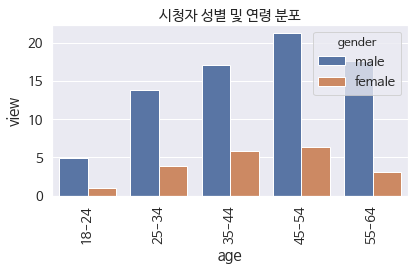

In [151]:
ax = sns.barplot(x="age", y="view", hue="gender", data=df_plot)
plt.xticks(rotation=90)
plt.title("시청자 성별 및 연령 분포")
plt.tight_layout()

plt.savefig("../weekly_plots/fb_gender_age.png")

In [152]:
people = [20,30,40, 50,60,70]
sns_type = ["facebook", "instagram", "youtube", "facebook", "instagram", "youtube"]
date = ["previous"] * 3  + ["Now"] * 3

df = pd.DataFrame({"people" : people, "sns_type" : sns_type, "date" : date})

In [153]:
# Line graph

columns = df_fb_results.iloc[1]
df_plot = df_fb_results.iloc[-7:]
df_plot.columns = columns



temp_list = []
for record in df_plot.iterrows():
    date = record[1]['날짜'][:10]
    view = int(record[1]['Facebook 페이지 도달'])
    
    temp_list.append({"date": date, "view": view})

In [155]:
df_plot = pd.DataFrame(temp_list)

In [156]:
df_plot.head()

,date,view
0,2021-10-06,1333
1,2021-10-07,6658
2,2021-10-08,3982
3,2021-10-09,1134
4,2021-10-10,1324


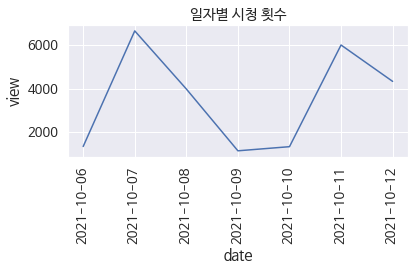

In [157]:
## View time series graph


ax = sns.lineplot(x="date", y="view", data=df_plot)
plt.xticks(rotation=90)
plt.title("일자별 시청 횟수")
plt.tight_layout()

plt.savefig("../weekly_plots/fb_views.png")

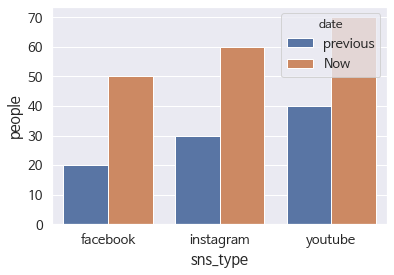

In [158]:
ax = sns.barplot(x="sns_type", y="people", hue="date", data= df)